In [3]:
import numpy as np
import os
import re
import cv2
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sn
from tqdm import tqdm
import pandas as pd
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D , Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

sn.set(font_scale=1.4)

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
exit()



In [1]:
import numpy as np
import os
import re
import cv2
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sn
from tqdm import tqdm
import pandas as pd
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D , Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

sn.set(font_scale=1.4)

ModuleNotFoundError: No module named 'tensorflow'

In [6]:

%conda install conda-forge::tensorflow


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\Harshita



In [7]:

!pip install tensorflow

In [10]:
import numpy as np
import os
import re
import cv2
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sn
from tqdm import tqdm
import pandas as pd
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D , Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

sn.set(font_scale=1.4)

In [9]:
!pip install --upgrade bottleneck


  Obtaining dependency information for bottleneck from https://files.pythonhosted.org/packages/76/ab/3e95d162d356c853b7c0c084871900d5bdce5e9ad5479396d9641c2dee99/Bottleneck-1.4.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/111.6 kB ? eta -:--:--
   --- ------------------------------------ 10.2/111.6 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/111.6 kB 435.7 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/111.6 kB 393.8 kB/s eta 0:00:01
   -------------------------------- ------ 92.2/111.6 kB 655.4 kB/s eta 0:00:01
   -------------------------------------- 111.6/111.6 kB 649.9 kB/s eta 0:00:00
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Harshita Mohan\\anaconda3\\Lib\\site-packages\\~ottleneck\\move.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [15]:
# Define the class names and store them in the labels
class_names = [
    'Corn___Cercospora_leaf_spot Gray_leaf_spot',
    'Corn___healthy',
    'Corn___Northern_Leaf_Blight',
    'Corn__Common_rust'
   
]
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)

IMAGE_SIZE = (224, 224)

def pre_process(img_path):
    """
    Preprocess the image by reading it, resizing it, and converting it to RGB.
    """
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    return image

def load_data():
    """
    Load the images and labels from the folders.
    """
    dataset = r'C:\Users\Harshita Mohan\Desktop\corn leaf disease detection\train'

    images = []
    labels = []
    print("Loading {}".format(dataset))

    for folder in os.listdir(dataset):
        label = class_names_label[folder]

        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            img_path = os.path.join(os.path.join(dataset, folder), file)
            image = pre_process(img_path)

            images.append(image)
            labels.append(label)

    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')

    return images, labels


In [16]:
# Load the data
images, labels = load_data()

Loading C:\Users\Harshita Mohan\Desktop\corn leaf disease detection\train


100%|██████████| 1146/1146 [00:14<00:00, 78.28it/s]


In [17]:
# Split the data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=25)

n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of testing examples: {}".format(n_test))
print("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 3238
Number of testing examples: 810
Each image is of size: (224, 224)


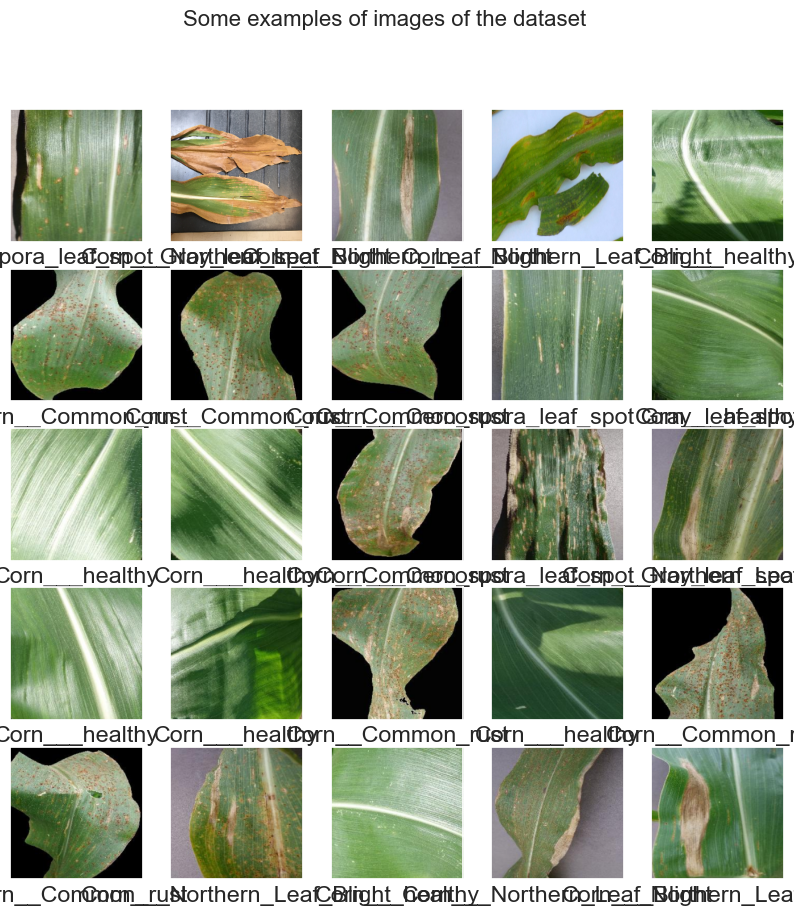

In [18]:
# Scale the data
train_images = train_images / 255.0
test_images = test_images / 255.0

def display_examples(class_names, images, labels):
    """
    Display some examples of the images in the dataset.
    """
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

def display_random_image(class_names, images, labels):
    """
    Display a random image from the dataset.
    """
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()


display_examples(class_names, train_images, train_labels)



In [19]:
# Define constants for image size and batch size
IMAGE_SIZE = 224
BATCH_SIZE = 32

In [21]:
# Define the model for resizing and rescaling
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Removed 'experimental'
    layers.Rescaling(1./255)
])


In [23]:
# Define the model for data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Removed 'experimental.preprocessing'
    layers.RandomRotation(0.2),
])


In [26]:
# Load your image data as a dataset
# For example:
train_dataset = keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Harshita Mohan\Desktop\corn leaf disease detection\train",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
)

Found 4048 files belonging to 4 classes.


In [27]:
# Get a batch of images
for images, _ in train_dataset.take(1):
    # Apply resizing and rescaling
    images = resize_and_rescale(images)

    # Apply data augmentation and get intermediate image outputs
    augmented_images = data_augmentation(images)
    intermediate_outputs = data_augmentation.predict(images)

    # Print the shape of the augmented images and intermediate outputs
    print("Augmented images shape:", augmented_images.shape)
    print("Intermediate outputs shape:", intermediate_outputs.shape)

    # Save the augmented images and intermediate outputs to disk
    for i, image in enumerate(augmented_images):
        keras.preprocessing.image.save_img(f"augmented_image_{i}.jpg", image)
    for i, output in enumerate(intermediate_outputs):
        keras.preprocessing.image.save_img(f"intermediate_output_{i}.jpg", output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Augmented images shape: (32, 224, 224, 3)
Intermediate outputs shape: (32, 224, 224, 3)


In [28]:
# Create the model
import time

# Set the batch size and image size
BATCH_SIZE = 32
IMAGE_SIZE = 224

# Load the pre-trained ResNet50V2 model
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
base_model = tf.keras.applications.ResNet50V2(
    input_shape=input_shape[1:], include_top=False, weights='imagenet')
base_model.trainable = False

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step


In [29]:
import time
import pandas as pd

# Define input shape and base model
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
base_model = tf.keras.applications.ResNet50V2(input_shape=input_shape[1:], include_top=False, weights='imagenet')
base_model.trainable = False

# Add new layers to the base model
x = layers.MaxPooling2D(pool_size=(2, 2))(base_model.output)
x = layers.Conv2D(64, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(nb_classes, activation='softmax')(x)

In [31]:
# Create the model and compile it
model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Convert labels to one-hot encoding
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 24,796,100 (94.59 MB)

 Trainable params: 1,230,532 (4.69 MB)

 Non-trainable params: 23,565,568 (89.90 MB)

In [32]:
# Train the model and measure training time
start_time = time.time()
history = model.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128, validation_data=(test_images, one_hot_test_labels))
end_time = time.time()
training_time = end_time - start_time

# Measure prediction speed
start_time = time.time()
model.predict(test_images[:100])
end_time = time.time()
prediction_speed = (end_time - start_time) / 100

# Print the results in table form
results = pd.DataFrame({'Training accuracy': history.history['accuracy'], 'Validation accuracy': history.history['val_accuracy']})
results.index.name = 'Epoch'
print(results)
print('Training time: {:.2f} seconds'.format(training_time))
print('Prediction speed: {:.2f} seconds per image'.format(prediction_speed))

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 252s 9s/step - accuracy: 0.5867 - loss: 1.1471 - val_accuracy: 0.8568 - val_loss: 0.5620
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 227s 9s/step - accuracy: 0.8711 - loss: 0.3432 - val_accuracy: 0.9099 - val_loss: 0.2936
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 229s 9s/step - accuracy: 0.9180 - loss: 0.2178 - val_accuracy: 0.9346 - val_loss: 0.1966
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 224s 9s/step - accuracy: 0.9469 - loss: 0.1473 - val_accuracy: 0.9333 - val_loss: 0.2263
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 229s 9s/step - accuracy: 0.9762 - loss: 0.0835 - val_accuracy: 0.9395 - val_loss: 0.2045
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
       Training accuracy  Validation accuracy
Epoch                                        
0               0.715256             0.856790
1               0.879864             0.909877
2               0.924336             0.934568
3               0.953984             0.933333
4               0.971279             0.939506
Training tim

In [39]:
import re
import os

# Path to the directory
directory_path = r"C:\Users\Harshita Mohan\Desktop\corn leaf disease detection\train"

# List to hold version numbers
version_numbers = []

# Iterate over filenames and extract version numbers
for filename in os.listdir(directory_path):
    match = re.search(r'\d+', filename)
    if match:
        # Convert matched numbers to integer and add to the list
        version_numbers.append(int(match.group()))

# Ensure there's a baseline version number of 0
version_numbers.append(0)

# Determine the next version number
model_version = max(version_numbers) + 1

print(f"Next model version: {model_version}")


Next model version: 1


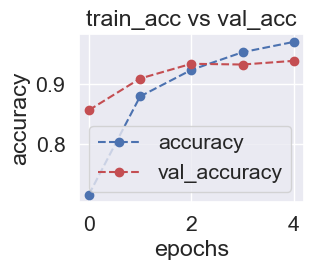

In [40]:
# Plot the accuracy and loss graphs
'''plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.5])
plt.legend(loc='upper right')'''
plt.subplot(221)
plt.plot(history.history['accuracy'], 'bo--', label="accuracy")
plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

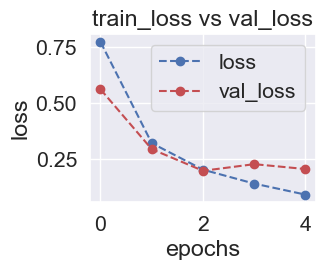

In [41]:
    # Plot loss function
plt.subplot(222)
plt.plot(history.history['loss'], 'bo--', label="loss")
plt.plot(history.history['val_loss'], 'ro--', label="val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step


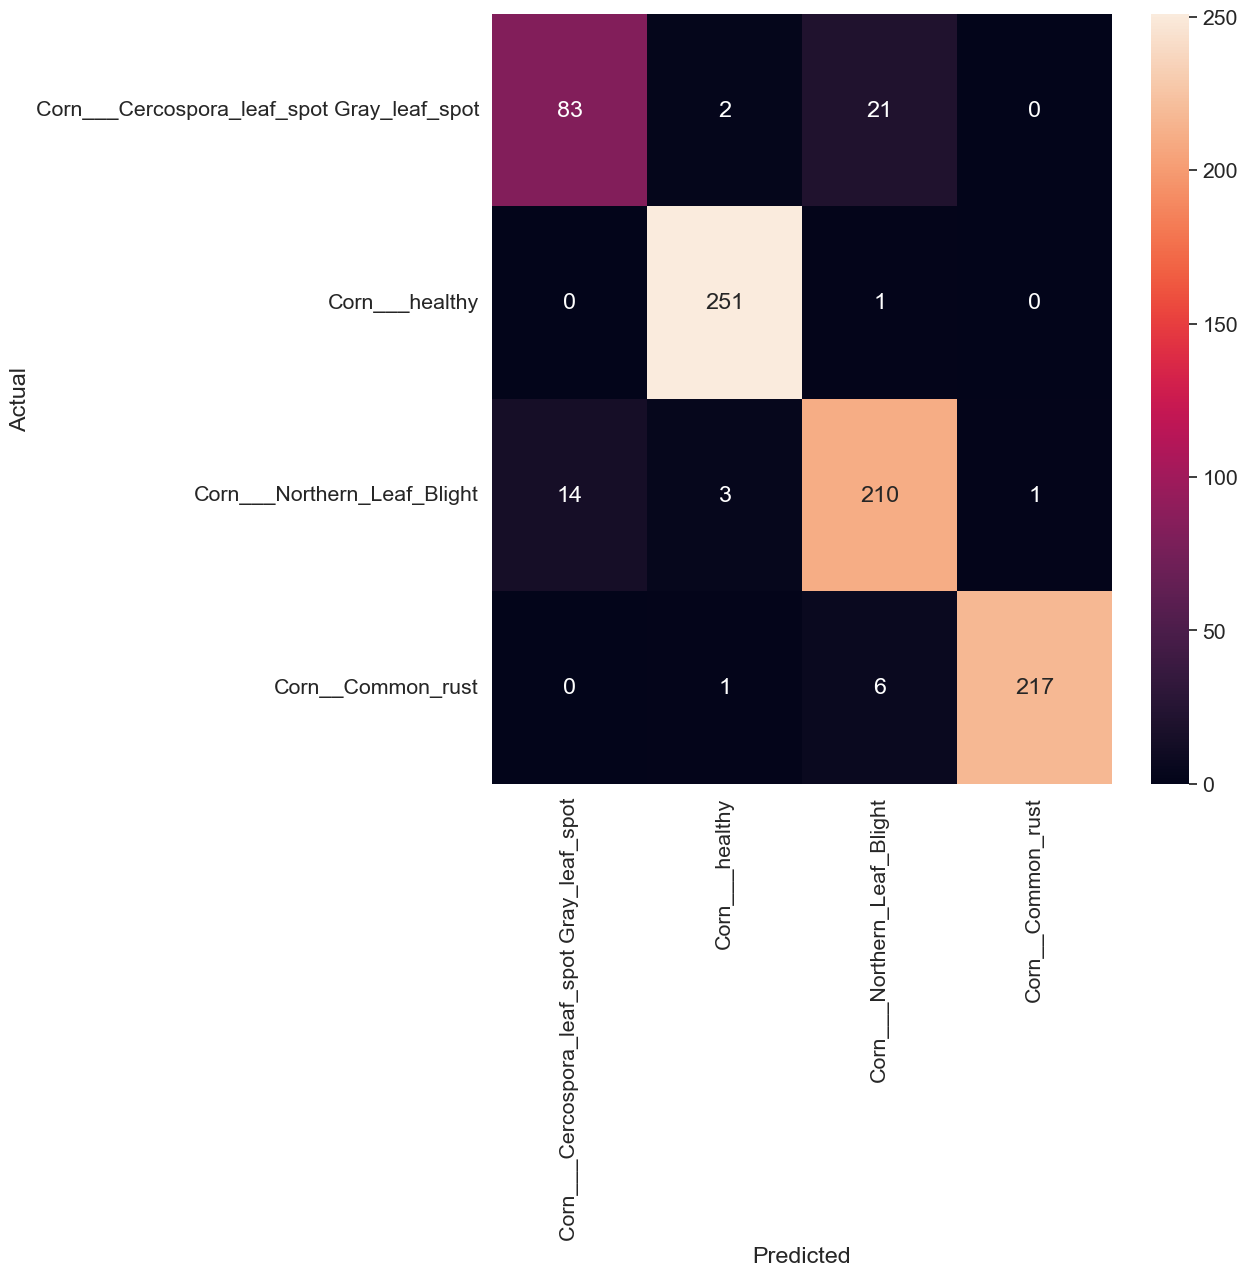

In [42]:
# Predict the labels of the test images
test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 10))
sn.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

